In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

In [3]:
churn=pd.read_csv('customer_churn.csv')
churn.head(50)
churn.Churn.value_counts(dropna=False)
churn.shape
churn.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
churn.shape
churn.info
churn.columns
#churn.isna().sum - ( #Show which entries in a DataFrame are NA)
#churn.dtypes - # the dtypes in the DataFrame


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
# to facilitate all the other columns has been dropped that might be a disadvantage to have a high accuracy rate due to the limitations. 
# Total Charges might be useful to investigate. 
churn2 = churn.drop(columns=['customerID', 'gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'Contract',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'TotalCharges',
       'PaymentMethod'])
churn.isna().sum  # (Show which entries in a DataFrame are NA)
churn2.dtypes  # the dtypes in the DataFrame

SeniorCitizen       int64
tenure              int64
MonthlyCharges    float64
Churn              object
dtype: object

In [6]:
churn.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [7]:
# numerical data in daraframe
# catorgical data in dataframe
categorical = churn2.select_dtypes("object").T
# numerical 
 #numerical data in daraframe
numerical = churn2._get_numeric_data()
# categorical
# churn2.shape
numerical
churn2

,SeniorCitizen,tenure,MonthlyCharges,Churn
0,0,1,29.85,No
1,0,34,56.95,No
2,0,2,53.85,Yes
3,0,45,42.30,No
4,0,2,70.70,Yes
...,...,...,...,...
7038,0,24,84.80,No
7039,0,72,103.20,No
7040,0,11,29.60,No
7041,1,4,74.40,Yes


In [8]:
# churn2['MonthlyCharges']=pd.to_numeric(churn2['MonthlyCharges'], errors='coerce')
# churn2['MonthlyCharges'] = churn2['MonthlyCharges'].astype('int64')

In [9]:
# churn2.MonthlyCharges.value_counts(dropna=False)
churn2.dtypes 

SeniorCitizen       int64
tenure              int64
MonthlyCharges    float64
Churn              object
dtype: object

In [10]:
list(churn2.columns.values)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Churn']

In [11]:
# do the X/y split!
X = churn2.drop('Churn',axis = 1)
y = churn2['Churn']

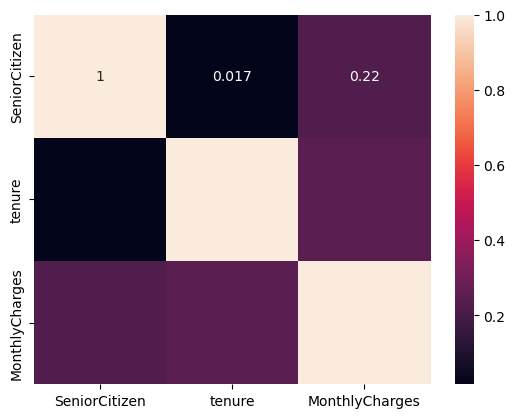

In [12]:
correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [13]:
# train-test-split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [14]:
# all features are numeric,  no need to split into _num and _cat
transformer = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(transformer.transform(X_train),columns=X.columns)
# because this is the only tranformation we apply to the numerics,
# we can immediately transform the X_test as well
X_test_scaled = pd.DataFrame(transformer.transform(X_test),columns=X.columns)
X_train_scaled.head()

,SeniorCitizen,tenure,MonthlyCharges
0,-0.435476,-0.340191,-0.514314
1,2.296336,0.883210,0.017840
2,-0.435476,-1.196572,-0.819594
3,-0.435476,1.168670,-1.483535
4,-0.435476,-0.829552,0.658427


In [15]:
y_train.head()

3296     No
6397     No
6043    Yes
5309     No
3000    Yes
Name: Churn, dtype: object

In [16]:
# let see if the transformation also reset the index for X_train_scaled
# for y_test as well...
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
# same results, no needed

In [17]:
y_train.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [18]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [19]:
LR.predict_proba(X_train_scaled)

array([[0.83055757, 0.16944243],
       [0.88959148, 0.11040852],
       [0.66558189, 0.33441811],
       ...,
       [0.98794797, 0.01205203],
       [0.25884511, 0.74115489],
       [0.79626532, 0.20373468]])

In [20]:
logits = np.log(1/LR.predict_proba(X_train_scaled)[:,1]-1)
logits

array([ 1.58958405,  2.08657509,  0.68826966, ...,  4.40639695,
       -1.05197978,  1.3631139 ])

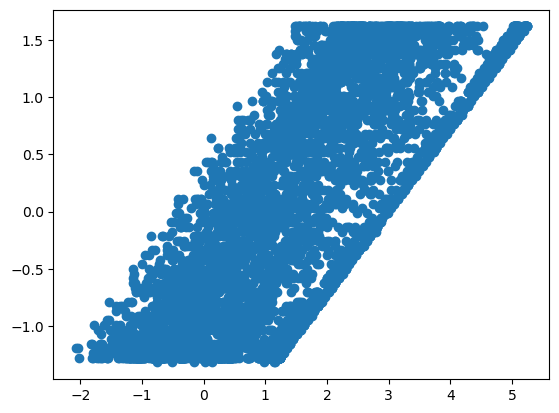

In [21]:
plt.scatter(logits,X_train_scaled['tenure'])

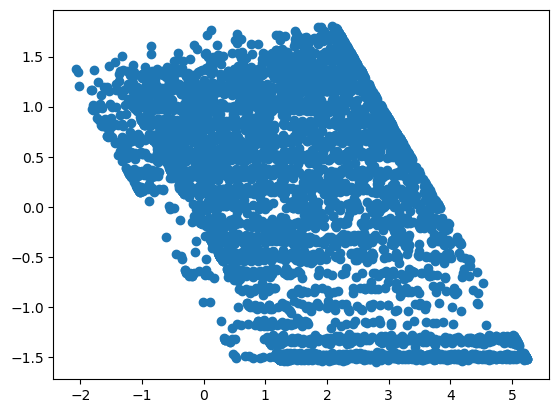

In [22]:
plt.scatter(logits,X_train_scaled['MonthlyCharges'])

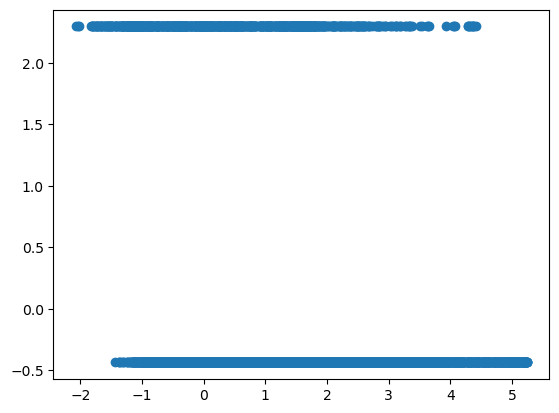

In [23]:
plt.scatter(logits,X_train_scaled['SeniorCitizen']) 
# it looks like a direct correlation and linear regression! 

<Axes: xlabel='Churn'>

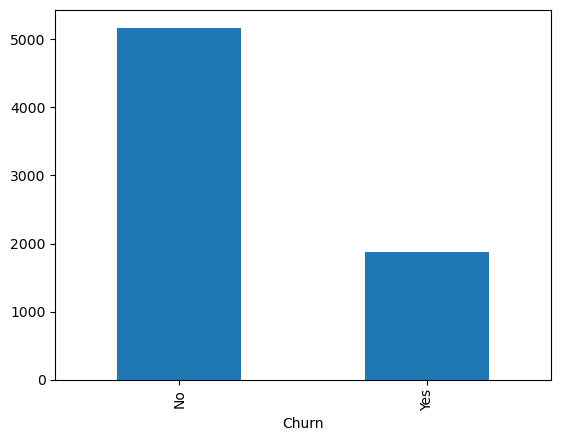

In [24]:
count_classes = churn2['Churn'].value_counts()
count_classes
count_classes.plot(kind = 'bar')

In [25]:
# Churn
# No     5174
# Yes    1869
5174/(1869+5174)

0.7346301292063041

In [26]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)
LR.score(X_test_scaled, y_test)

0.7808063600227144

In [34]:

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# to deal with "Yes" and "No" values regarding Churn 
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Predictions
pred = LR.predict(X_test_scaled)

# Convert string predictions to numeric values and dealing with "Yes" and "No" values regarding Churn 
pred_encoded = label_encoder.transform(pred)

# Compute metrics using encoded labels
print("precision: ", precision_score(y_test_encoded, pred_encoded))
print("recall: ", recall_score(y_test_encoded, pred_encoded))
print("f1: ", f1_score(y_test_encoded, pred_encoded))


precision:  0.6115942028985507
recall:  0.4557235421166307
f1:  0.5222772277227723


In [41]:
# SMOTE
#!pip install imbalanced-learn
# this used to be !pip install imblearn
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=84, k_neighbors=5)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)


In [42]:
X_train_SMOTE.shape

(7752, 3)

In [43]:
# yet another small improvement, but bear in mind that we saved 12 hypothetical people with
# these "small improvements"
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test_scaled)

print("precision: ", precision_score(y_test_encoded, pred_encoded))
print("recall: ", recall_score(y_test_encoded, pred_encoded))
print("f1: ", f1_score(y_test_encoded, pred_encoded))

precision:  0.6115942028985507
recall:  0.4557235421166307
f1:  0.5222772277227723


In [ ]:
# Same result with the imblearn.over_sampling.SMOTE library. Do the results are equel due to the focusing on just four rows? Review again! 